In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
FirstCity=pd.read_excel('E:\Python\Data\FirstCity.xlsx','Data')
FirstCity.head()

,Price,SqFeet,Age,Bedrooms,Bathrooms,Garage
0,110000,1000,28,3,1,1
1,133500,1400,23,3,1,1
2,112500,1248,58,3,4,1
3,141750,1106,12,2,1,1
4,195250,2112,78,2,6,2


<AxesSubplot:xlabel='SqFeet', ylabel='Price'>

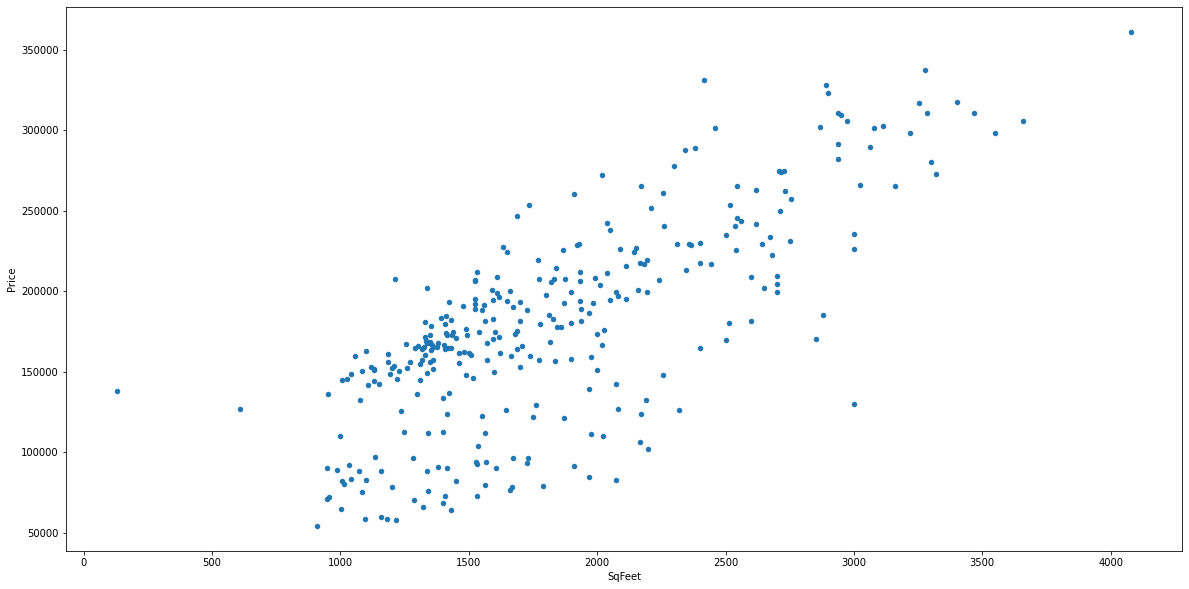

In [3]:
FirstCity.plot.scatter(x='SqFeet',y='Price',figsize=[20,10])

In [4]:
FirstCity.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,Price,SqFeet,Age,Bedrooms,Bathrooms,Garage
Price,1.000000,0.718361,-0.437838,0.518124,0.645344,0.683598
SqFeet,0.718361,1.000000,-0.031829,0.704790,0.628295,0.429158
Age,-0.437838,-0.031829,1.000000,-0.156873,-0.319398,-0.500094
Bedrooms,0.518124,0.704790,-0.156873,1.000000,0.600232,0.332025
Bathrooms,0.645344,0.628295,-0.319398,0.600232,1.000000,0.478584
Garage,0.683598,0.429158,-0.500094,0.332025,0.478584,1.000000


In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import scipy.stats as st
import math 

#iniate constant_b0
X=FirstCity[['SqFeet','Age','Bedrooms', 'Bathrooms','Garage']]
X=sm.add_constant(X)
y=FirstCity['Price']
#Simple regression analysis
model=sm.OLS(y,X)
results = model.fit()
#can change your alpha level
alpha=0.05

#summary of the model
print(results.summary(alpha))
#print the regression equation
#print('y_hat =',round(results.params[0],4),'+',round(results.params[1],4),'x +',round(results.params[2],4),'x +',round(results.params[3],4))
print('MSR Value:',(results.mse_model).round(2))
MSE = results.mse_resid
print('MSE Value:',MSE.round(2))
RMSE = math.sqrt(MSE)
print('RMSE Value:%.3f'%RMSE)

                            OLS Regression Results                            
Dep. Variable:                   0.05   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     277.8
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          9.04e-113
Time:                        15:58:58   Log-Likelihood:                -3708.7
No. Observations:                 319   AIC:                             7429.
Df Residuals:                     313   BIC:                             7452.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.113e+04   9539.669      3.263      0.0

In [9]:
print("Predicted values: ",  results.predict().round(2))

Predicted values:  [ 68643.38  99591.82  60516.42 102049.7  135774.22  76250.69 126440.6
 142463.65 111958.35  91134.69 113262.03 126832.12 129631.33 129625.52
 146637.24 146637.24 146637.24 132008.85 143407.96 135964.73 142358.49
 143411.17 132479.79 130676.47 143673.15 112211.58 103181.72 146045.97
 187442.38 155560.19 152038.23 145906.49 142515.32 154457.38 141970.38
 137823.12 162277.52 150428.71 153951.13 157861.2  159124.23 161079.27
 155085.06 148898.34 159502.63 154231.16 151356.18 146727.28 158367.45
 155329.32 158421.26 167267.19 167137.66 157979.8  160763.94 155719.16
 162885.52 171916.84 146546.41 169601.17 157925.99 160799.24 164295.62
 151510.08 155943.19 140416.34 139961.4  158998.1  160385.55 179736.98
 163854.16 168194.71 165547.67 181489.89 193255.95 197980.95 183751.
 192791.84 159881.02 158367.45 191476.91 199688.64 199688.64 163980.29
 170791.38 165115.47 180683.38 164286.36 177835.24 157608.94 200220.84
 167580.8  169373.98 199688.64 146839.78 106697.51 197607.48 